In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('datos.data')
df.head()

,Edad,Puntuacion,Ingresos,Nivel_de_Educacion
0,35,82,50000,Licenciatura
1,28,75,45000,Maestría
2,42,90,60000,Doctorado
3,30,68,48000,Licenciatura
4,39,85,55000,Maestría


In [5]:
df['Edad'].mean()

np.float64(35.5)

In [6]:
df['Puntuacion'].min()

np.int64(68)

In [11]:
df['Nivel_de_Educacion'].value_counts().idxmax()

' Licenciatura'

In [12]:
df['Ingresos'].median()

np.float64(52500.0)

In [ ]:
print((df['Puntuacion'] >= 80).sum()) #True = 1, False = 0
print(df.loc[df['Puntuacion'] >= 80, 'Puntuacion'].count())

11
11


In [34]:
df2 = pd.read_csv("predicciones_scores.data")
df2.head()

,Real_Label,Predicted_Score,Predicted_label
0,0,0.156098,0
1,0,0.433585,0
2,1,0.957655,1
3,0,0.281928,0
4,0,0.336131,0


In [28]:
from sklearn.metrics import roc_curve, RocCurveDisplay

c:\Users\SIMON\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


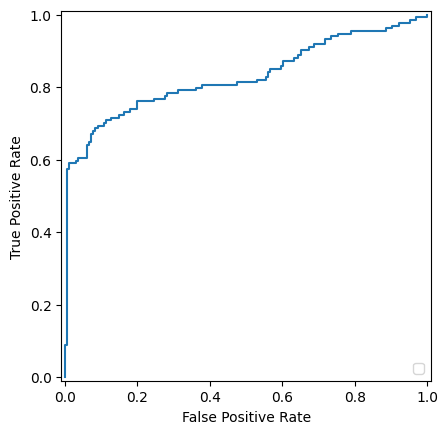

In [53]:
real_labels = df2["Real_Label"]
predicted_scores = df2["Predicted_Score"]
predicted_labels = df2["Predicted_label"]

# Compute ROC curve
fpr, tpr, _ = roc_curve(real_labels, predicted_scores) # Compute AUC score
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [62]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [59]:
accuracy_score(real_labels, predicted_labels)

0.8

In [57]:
precision_score(real_labels, predicted_labels)

0.8936170212765957

In [56]:
recall_score(real_labels, predicted_labels)

0.6268656716417911

In [60]:
f1_score(real_labels, predicted_labels)

0.7368421052631579

In [61]:
print(classification_report(real_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       166
           1       0.89      0.63      0.74       134

    accuracy                           0.80       300
   macro avg       0.83      0.78      0.79       300
weighted avg       0.82      0.80      0.79       300



In [63]:
confusion_matrix(real_labels, predicted_labels)

array([[156,  10],
       [ 50,  84]])

In [64]:
dfTrain = pd.read_csv("train_set.csv")
dfTest = pd.read_csv("test_set.csv")

In [65]:
dfTrain.head()

,feat1,feat2,target
0,1.579111,0.315508,0
1,1.555956,-0.452396,0
2,0.020154,1.012914,1
3,-0.048604,-0.997602,0
4,0.443537,-0.646990,0


In [66]:
dfTest.head()

,feat1,feat2,target
0,-0.568675,-1.222207,0
1,1.493420,0.237040,0
2,-1.437050,1.934122,1
3,0.349044,-0.488677,0
4,2.028682,0.070170,0


In [68]:
dfGeneral = pd.concat([dfTrain, dfTest], axis=0)
dfGeneral.head()

,feat1,feat2,target
0,1.579111,0.315508,0
1,1.555956,-0.452396,0
2,0.020154,1.012914,1
3,-0.048604,-0.997602,0
4,0.443537,-0.646990,0


In [70]:
dfGeneral['target'].value_counts()

target
0    589
1    411
Name: count, dtype: int64

In [71]:
from sklearn import neighbors

In [77]:

k_values = [3, 5 , 7]

for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(dfTrain[['feat1', 'feat2']], dfTrain['target'])
    y_pred = knn.predict(dfTest[['feat1', 'feat2']])
    print(accuracy_score(dfTest['target'], y_pred))

0.9233333333333333
0.9133333333333333
0.9166666666666666


In [78]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(dfTrain[['feat1', 'feat2']], dfTrain['target'])
y_pred = knn.predict(dfTest[['feat1', 'feat2']])
confusion_matrix(dfTest['target'], y_pred)

array([[158,   8],
       [ 17, 117]])

In [81]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression()
model.fit(dfTrain[['feat1', 'feat2']], dfTrain['target'])
print(f"coeficients: {model.coef_} and intercept: {model.intercept_}")

coeficients: [[-0.32542512  1.43318533]] and intercept: [-0.12096481]
